## HW 11 - Data fitting with various functions - Due Monday Nov 7, 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LogG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit {\bf  GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit {\bf NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [61]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters



# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exp(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

#################################################################

def mcFit(x, y, y_err):
    slopes = list()
    y_ints = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights_y = np.random.randn(len(y))
        weights_x = np.random.randn(len(x))
        y_adj = y + y_err*weights_y
        x_adj = x + 0.5*weights_x

        params, other = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return slopes, y_ints

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))

def mcFit5(func, x, y, y_err, x_err):#, p0=p0):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)#,p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))



In [ ]:
#NUMBER 1:

gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['TEFF']>-1) &\
     (star['LogG']>-1) & (star['GLAT']<1) & (star['GLAT']>-1)
good = np.where(gd)[0]

TEFFg = star['TEFF'][good]
LogGg = star['LogG'][good]

popt, pcov = opt.curve_fit(linear, TEFFg, star['LogG'][good])
popt_err, pcov = opt.curve_fit(linear, TEFFg, star['LogG'][good], sigma=star['LOGG_err'][good])


pa1,pb1,pc1,pd1 = mcFit5(poly3, star['TEFF'][good], star['LogG'][good], star['LOGG_err'][good],star['TEFF_err'][good])
#slope,intr = mcFit2(linear, star['TEFF'][good], star['LogG'][good], star['LOGG_err'][good],star['TEFF_err'][good])
#print('slope:',slope, 'y_ints:',intercept)
print(pa1,pb1,pc1,pd1)
#slope, intercept = McFit2(linear, )

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(TEFFg,LogGg,s=10,c='b',alpha=0.1)

ax.errorbar(TEFFg,star['LogG'][good],xerr=star['TEFF_err'][good], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
ax.errorbar(TEFFg,star['LogG'][good],yerr=star['LOGG_err'][good], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)


x_plot=np.linspace(3000,10000,1000)
ax.plot(x_plot, poly3(x_plot,pa1,pb1,pc1,pd1))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('TEFF',fontsize=20)
ax.set_ylabel('LogG',fontsize=20)
plt.show()

In [ ]:
#NUMBER 2:

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['Fe_H']>-10) &\
     (star['O_FE']>-10) & (star['O_FE']<0.2) & (star['GLAT']<10) & (star['GLAT']>-10)
good2 = np.where(gd2)[0]

gd22 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['Fe_H']>-10) &\
     (star['O_FE']>0.17) & (star['GLAT']<10) & (star['GLAT']>-10)
good22 = np.where(gd22)[0] #above 0.2, small clump

gd23 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['Fe_H']>-10) &\
     (star['O_FE']>-10) & (star['O_FE']<0.17) & (star['GLAT']<10) & (star['GLAT']>-10)
good23= np.where(gd23)[0] #below 0.2, big clump


FEHGup = star['Fe_H'][good22]
FEHGdown = star['Fe_H'][good23]
OFEGup = star['O_FE'][good22]
OFEGdown = star['O_FE'][good23]

pA1,pB1,pC1,pD1 = mcFit5(cosfit,star['Fe_H'][good22],star['O_FE'][good22],star['O_FE_ERR'][good22],star['Fe_H_ERR'][good22])#,p0=[0.1,2.7,1.5,.2])
pA2,pB2,pC2,pD2 = mcFit5(poly3,star['Fe_H'][good23],star['O_FE'][good23],star['O_FE_ERR'][good23],star['Fe_H_ERR'][good23])#,p0=[0.1,2.7,1.5,.2])



fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(FEHGup,OFEGup,s=10,c='b',alpha=0.1)
ax.scatter(FEHGdown,OFEGdown,s=10,c='r',alpha=0.1)
ax.set_xlabel('Fe_H',fontsize=20)
ax.set_ylabel('O_Fe',fontsize=20)

#ax.errorbar(star['Fe_H'][good2],star['O_FE'][good2],xerr=star['Fe_H_ERR'][good2], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
#ax.errorbar(star['Fe_H'][good2],star['O_FE'][good2],yerr=star['O_FE_ERR'][good2], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)

x_plot=np.linspace(-1,0.5,1000)
ax.plot(x_plot, cosfit(x_plot,pA1,pB1,pC1,pD1))
ax.plot(x_plot, poly3(x_plot,pA2,pB2,pC2,pD2))
#ax.plot(x_plot, cosfit(x_plot,0.1,2.7,1.5,.2))

In [ ]:
#NUMBER 3:

gd31 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['Fe_H']>-10) & (star['O_FE']>0.17) & (star['GLAT']<2) & (star['GLAT']>-2)
good31 = np.where(gd31)[0] #above 0.2, small clump

gd32 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['Fe_H']>-10) & (star['O_FE']>-10) & (star['O_FE']<0.17) & (star['GLAT']<2) & (star['GLAT']>-2)
good32= np.where(gd32)[0] #below 0.2, big clump


FEHGup3 = star['Fe_H'][good31]
FEHGdown3 = star['Fe_H'][good32]
OFEGup3 = star['O_FE'][good31]
OFEGdown3 = star['O_FE'][good32]

pA31,pB31,pC31,pD31 = mcFit5(cosfit,star['Fe_H'][good31],star['O_FE'][good31],star['O_FE_ERR'][good31],star['Fe_H_ERR'][good31])#,p0=[0.1,2.7,1.5,.2])
pA32,pB32,pC32,pD32 = mcFit5(poly3,star['Fe_H'][good32],star['O_FE'][good32],star['O_FE_ERR'][good32],star['Fe_H_ERR'][good32])#,p0=[0.1,2.7,1.5,.2])



fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(FEHGup3,OFEGup3,s=10,c='b',alpha=0.1)
ax.scatter(FEHGdown3,OFEGdown3,s=10,c='r',alpha=0.1)
ax.set_xlabel('Fe_H',fontsize=20)
ax.set_ylabel('O_Fe',fontsize=20)

#ax.errorbar(star['Fe_H'][good2],star['O_FE'][good2],xerr=star['Fe_H_ERR'][good2], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
#ax.errorbar(star['Fe_H'][good2],star['O_FE'][good2],yerr=star['O_FE_ERR'][good2], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)

x_plot=np.linspace(-1,0.5,1000)
ax.plot(x_plot, cosfit(x_plot,pA31,pB31,pC31,pD31),c='k',alpha=0.5)
ax.plot(x_plot, poly3(x_plot,pA32,pB32,pC32,pD32),c='k',alpha=0.5)

5.284427153601934e-10 -1.0178467464595905e-05 0.05810878250772572 -113.87946129402232


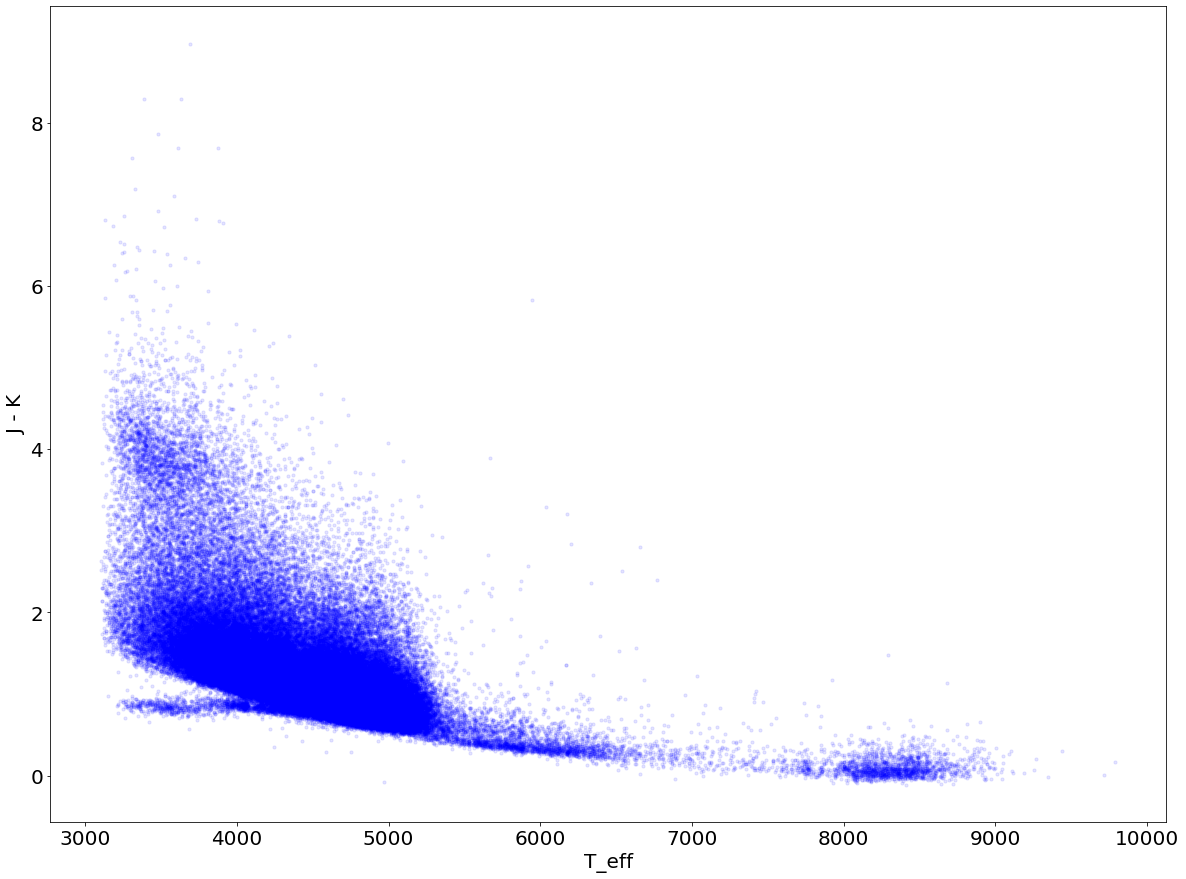

In [14]:
#4
#TEFF, (TEFF_ERR) vs. (J - K) (J_ERR, K_ERR), -10 glat 10
#error = sqrt(Jerr**2 + Kerr**2) bc sig = sqrt(sig1+sig2)

gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['J'] - star['K']) <10) & ((star['J'] - star['K']) != 0)  &\
     (star['TEFF'] > 0 ) &\
     (star['GLAT']<10) & (star['GLAT']>-10)
good4 = np.where(gd4)[0]

TEFFg4 = star['TEFF'][good4]

Jgood = star['J'][good4]
Kgood = star['K'][good4]
JK = Jgood - Kgood
JKerr = np.sqrt((star['J_err'][good4])**2 + (star['K_err'][good4])**2)


pa4,pb4,pc4,pd4 = mcFit5(poly3, TEFFg4, JK, JKerr,star['TEFF_err'][good4])                               
print(pa4,pb4,pc4,pd4)

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(TEFFg4,JK,s=10,c='b',alpha=0.1)

#ax.errorbar(TEFFg4,JK,xerr=star['TEFF_err'][good4], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
#ax.errorbar(TEFFg4,JK,yerr=JKerr, c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)


x_plot=np.linspace(3000,10000,1000)
ax.plot(x_plot, poly3(x_plot,pa4,pb4,pc4,pd4))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('T_eff',fontsize=20)
ax.set_ylabel('J - K',fontsize=20)
plt.show()

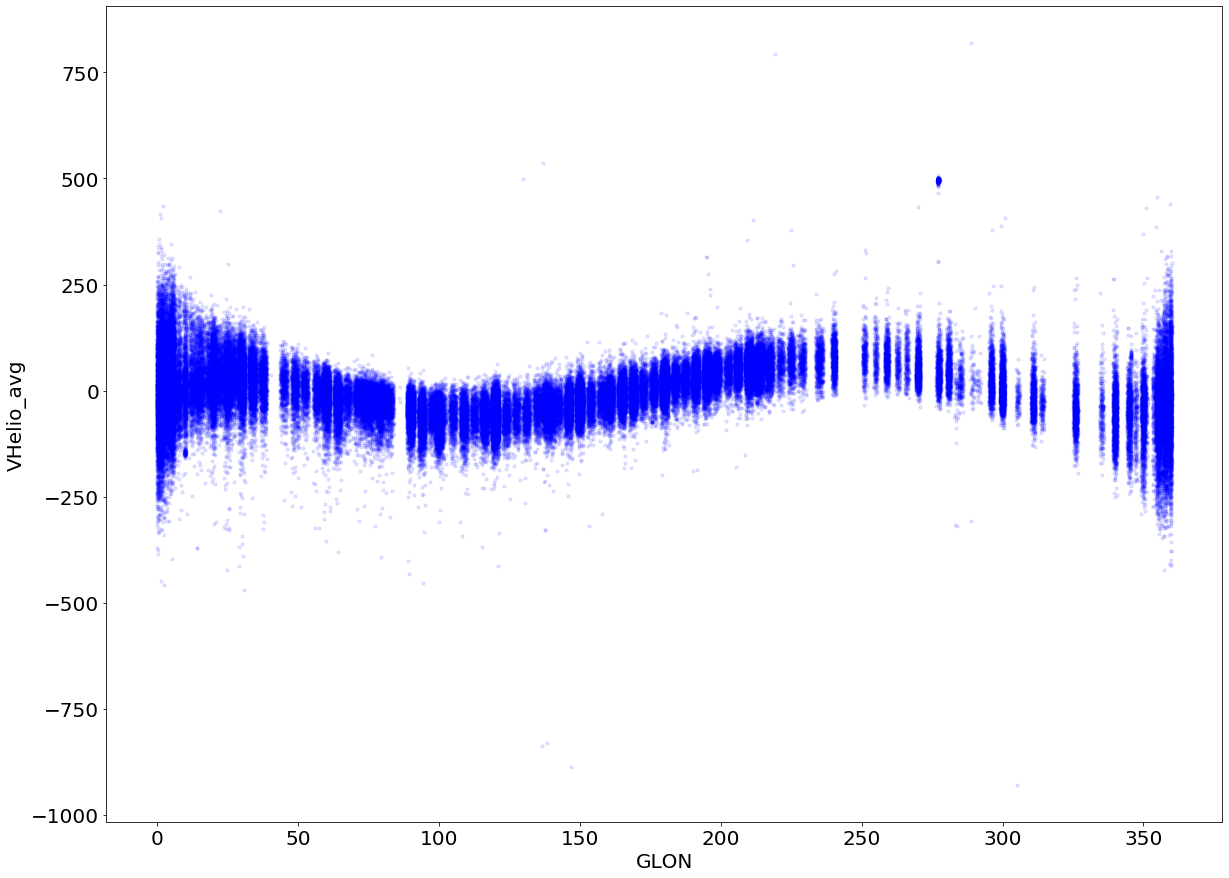

In [21]:
#5
#Select stars only with with  −10<𝐺𝐿𝐴𝑇<10
#GLON vs. VHEILO_AVG (VERR)

gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT']<10) & (star['GLAT']>-10)
good5 = np.where(gd5)[0]

Glon = star['GLON'][good5]
VHavg = star['VHELIO_AVG'][good5]



#pa5,pb5,pc5 = mcFit5(poly3, Glon, VHavg, star['VERR'][good5], star['VERR'][good5])                               
#print(pa5,pb5,pc5,pd5)

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(Glon,VHavg,s=10,c='b',alpha=0.1)

#ax.errorbar(TEFFg4,JK,xerr=star['TEFF_err'][good4],\
 #           c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
#ax.errorbar(Glon, VHavg, yerr=star['VERR'][good5], \
            #c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)


x_plot=np.linspace(3000,10000,1000)
#ax.plot(x_plot, poly3(x_plot,pa5,pb5,pc5))

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('GLON',fontsize=20)
ax.set_ylabel('VHelio_avg',fontsize=20)
plt.show()

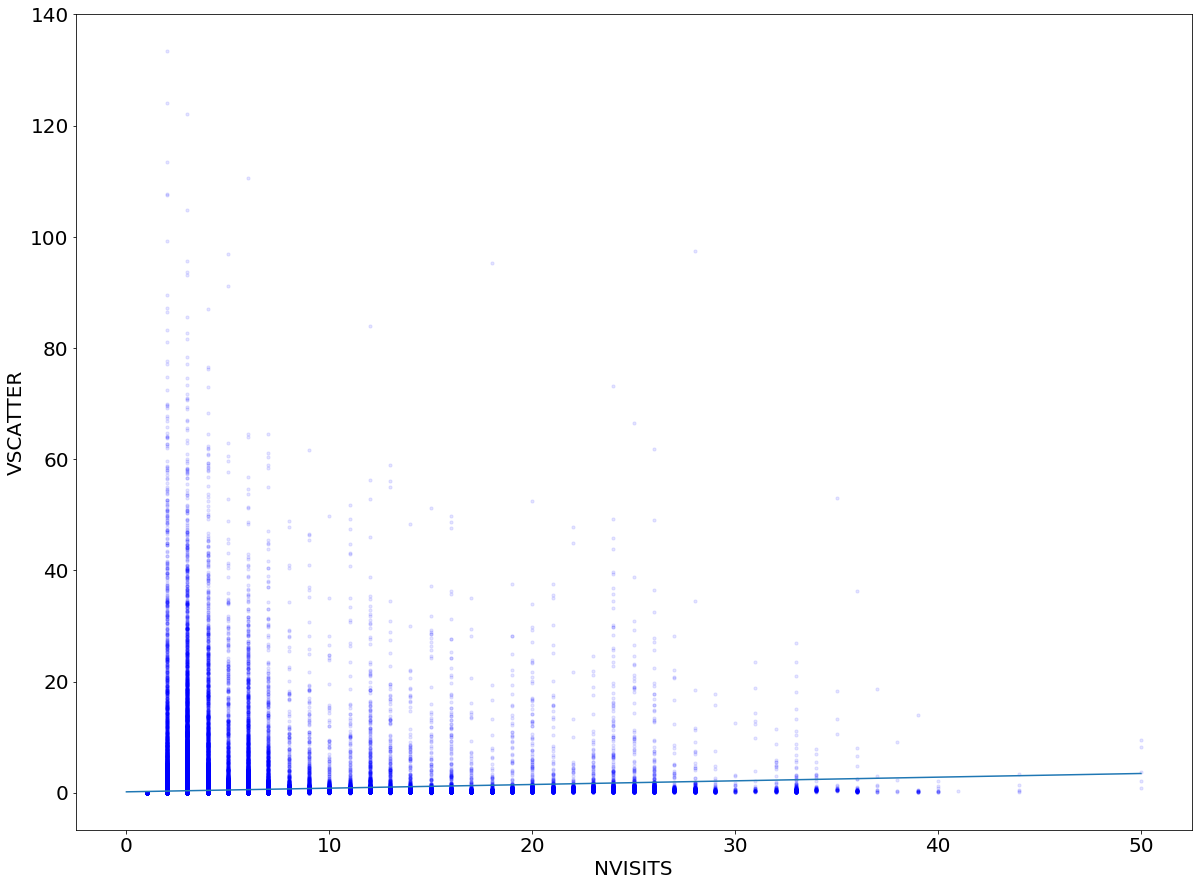

In [64]:
#Fit {\bf NVISITS vs. VSCATTER (VERR) For NVISITS  >=1

gd6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NVISITS']>=1) 
good6 = np.where(gd6)[0]

visits = star['NVISITS'][good6]
scatter = star['VSCATTER'][good6]


#pa6,pb6,pc6,pd6 = mcFit(poly3, visits,scatter, star['VERR'][good6])                               
#print(pa6,pb6,pc6,pd6)

#pa6,pb6,pc6,pd6 = mcFit5(poly3, visits,scatter, star['VERR'][good6], 0) 
slope6,int6 = mcFit2(linear, visits,scatter, star['VERR'][good6], 0)
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(visits,scatter,s=10,c='b',alpha=0.1)

#ax.errorbar(TEFFg4,JK,xerr=star['TEFF_err'][good4], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)
#ax.errorbar(visits,scatter, yerr=star['VERR'][good6], c='grey', fmt='.', markersize=1, capsize=3 ,zorder=0,alpha=0.5)


x_plot=np.linspace(0,50,100)
#ax.plot(x_plot, poly3(x_plot,pa6,pb6,pc6,pd6))

ax.plot(x_plot, linear(x_plot,slope6,int6))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('NVISITS',fontsize=20)
ax.set_ylabel('VSCATTER',fontsize=20)
plt.show() 


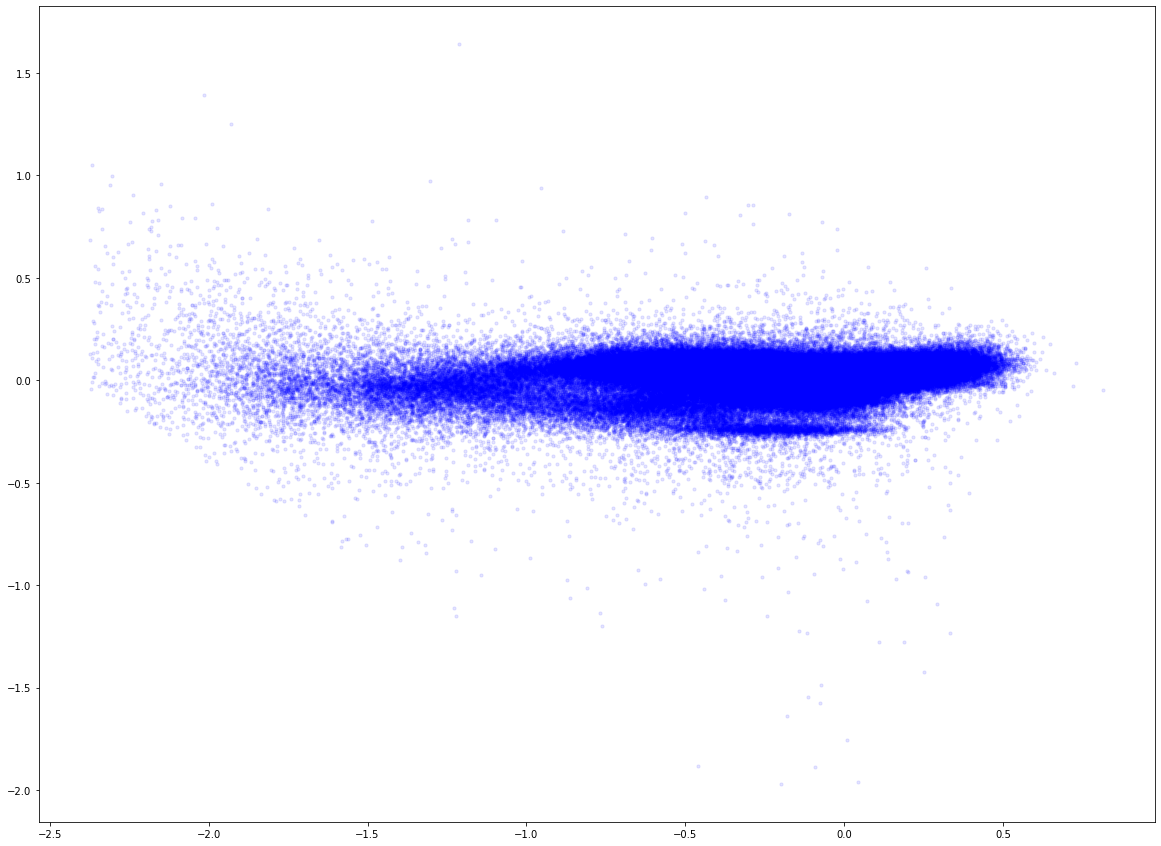

In [41]:
#Fit {\bf Fe_H, (Fe_H_ERR) vs. NI_FE (NI_FE_ERR)
     
gd7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['Fe_H'] > -100) & (star['NI_FE'] > -100)
good7 = np.where(gd7)[0]

feh = star['Fe_H'][good7]
nif = star['NI_FE'][good7]
fherr = star['Fe_H_ERR'][good7]
nferr = star['NI_FE_ERR'][good7]

pa7,pb7,pc7 = mcFit3(poly2, feh,nif,fherr,nferr)  

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(feh,nif,s=10,c='b',alpha=0.1)

x_plot=np.linspace(0,1000,100)
ax.plot(x_plot, poly3(x_plot,pa7,pb7,pc7,pd7))

#ax.plot(x_plot, linear(x_plot,slope6,int6))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Fe_H',fontsize=20)
ax.set_ylabel('NI_FE',fontsize=20)
plt.show() 
